<a href="https://colab.research.google.com/github/NytKing/Ad_click/blob/main/Ad_click.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [82]:
import pandas as pd
import numpy as np
import io
ads= pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))
#col= (dcm.columns.str.strip().str.upper()
           #   .str.replace(' ', '_')
           #   .str.replace('(', '')
           #   .str.replace(')', ''))
#col
ads

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [69]:
ads[ads.columns].isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [70]:
ads.shape

(400, 5)

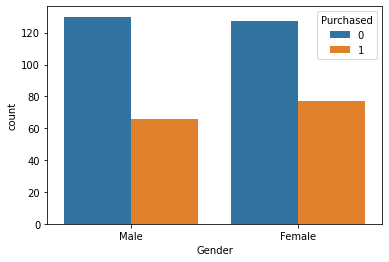

In [71]:
import seaborn as sns
sns.countplot(x="Gender",data=ads,hue="Purchased")

Text(0.5, 1.0, 'age group purchased')

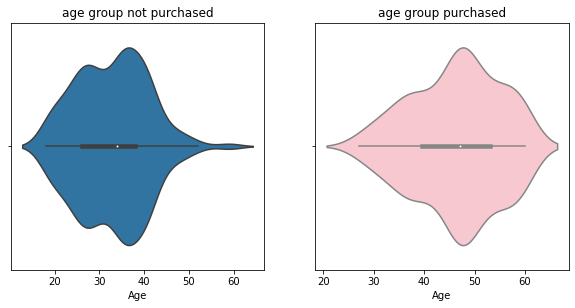

In [72]:
import matplotlib.pyplot as plt
ad=ads.replace(to_replace=[1,0],value=["Yes","No"])

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
ads_n=ad.loc[ad["Purchased"].isin(["No"])]
sns.violinplot(x="Age",data=ads_n)
plt.title("age group not purchased")

plt.subplot(2,2,2)
ads_y=ad.loc[ad["Purchased"].isin(["Yes"])]
sns.violinplot(x="Age",data=ads_y,hue="Gender",color="pink")
plt.title("age group purchased")


In [73]:
ad_m=ad.loc[ad['Gender'].isin(["Male"])]
print("Male mean=",round(ad_m['EstimatedSalary'].mean(),2))
ad_f=ad.loc[ad['Gender'].isin(["Female"])]
print("Female mean=",round(ad_f['EstimatedSalary'].mean(),2))


Male mean= 67642.86
Female mean= 71759.8


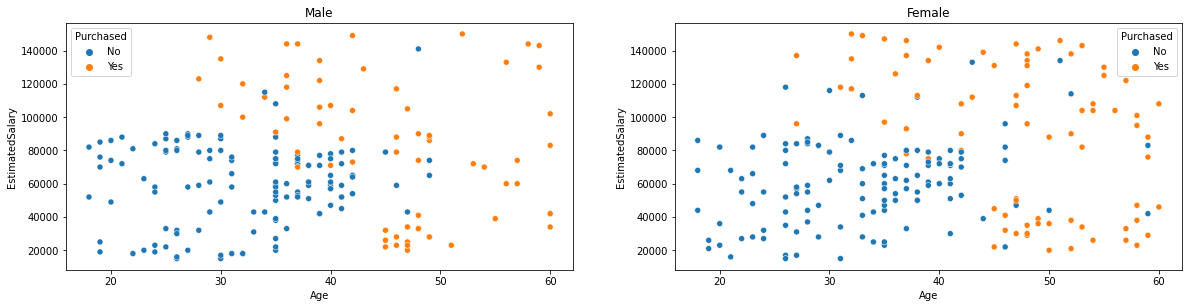

In [74]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("Male")
sns.scatterplot(x="Age",y="EstimatedSalary",data=ad_m,hue="Purchased")

plt.subplot(2,2,2)
plt.title("Female")
sns.scatterplot(x="Age",y="EstimatedSalary",data=ad_f,hue="Purchased")

In [93]:
ads=ads.replace(to_replace=["Male","Female"],value=[0,1])
ads=ads.drop(labels="User ID",axis=1)
ads

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


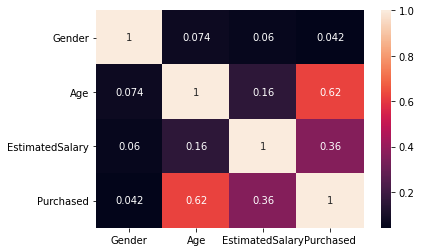

In [114]:
data=ads.corr()
feature=data.index
sns.heatmap(ads[feature].corr(),annot=True)

In [116]:
ads

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y=ads["Purchased"]
print(y)
x=ads.drop("Purchased",axis=1)
print(x)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64
     Gender  Age  EstimatedSalary
0         0   19            19000
1         0   35            20000
2         1   26            43000
3         1   27            57000
4         0   19            76000
..      ...  ...              ...
395       1   46            41000
396       0   51            23000
397       1   50            20000
398       0   36            33000
399       1   49            36000

[400 rows x 3 columns]


In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

(100, 3)

In [132]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
y_pred=model.predict(x_test)

In [134]:
confusion_matrix(y_test,y_pred)

array([[51,  7],
       [12, 30]])

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

81.0

In [159]:
new_input=[[0,25,25000]]
new_output=model.predict(new_input)
print(new_input,new_output)

[[0, 25, 25000]] [0]
